Primeiramente, importamos as bibiliotecas necessárias para o desenvolvimento do lab.

In [201]:
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

Logo abaixo, lemos o csv com os dados a serem analisados e mostramos em formato de tabela.

In [202]:
data_frame = pd.read_csv('./results.csv', sep=',')
data_frame.head()

,title,subtitle,author,date,section,text,url
0,“A sociedade foi Rubens Paiva não os facínora...,A decisão da juíza que proíbe as Forças Armada...,F. M.,30/03/2019 00:11:08,Brasil,A juíza federal Ivani Silva da Luz de Brasíli...,https://brasil.elpais.com/brasil/2019/03/26/po...
1,Justiça suspende decisão que proibia Forças Ar...,Liminar havia sido concedida na sexta-feira a ...,Marina Rossi,30/03/2019 16:17:59,Brasil,Menos de 24 horas depois de a juíza federal Iv...,https://brasil.elpais.com/brasil/2019/03/30/po...
2,Governo Bolsonaro prega “negacionismo históric...,Marcos Napolitano professor da USP diz que o...,Regiane Oliveira,04/04/2019 22:37:48,Brasil,Quando determinou que de 31 de março 1964 u...,https://brasil.elpais.com/brasil/2019/04/05/po...
3,Quando os pais de Gabo perceberam que tinham u...,Gustavo Tatis percorre o universo de García Má...,Jesús Ruiz Mantilla,07/03/2019 16:38:56,Cultura,Quando era pequeno Luisa e Gabriel se preo...,https://brasil.elpais.com/brasil/2019/03/06/cu...
4,Rádios canadenses banem músicas de Michael Jac...,Quebec Cogeco Media toma a decisão após queixa...,Jaime Porras Ferreyra,07/03/2019 16:12:37,Cultura,Desde a manhã da última segunda-feira e ...,https://brasil.elpais.com/brasil/2019/03/06/cu...


Para fazermos os processamentos necessários para o cálculo da lei de Zipf precisamos limpar o texto a ser processado, ou seja, retirar acentos, caracteres especiais e mudarmos todas as letras maiúsculas para minúsculas. Abaixo, apresentamos uma tabela com as dez primeiras linhas dos dados com o texto original e o texto "limpo".

In [203]:
data_frame = data_frame[['text']]
data_frame['clean_text'] = data_frame.text.apply(lambda x: re.sub('[^A-Za-z\']', ' ', x.lower()))
data_frame.head(n = 10)

,text,clean_text
0,A juíza federal Ivani Silva da Luz de Brasíli...,a ju za federal ivani silva da luz de bras li...
1,Menos de 24 horas depois de a juíza federal Iv...,menos de horas depois de a ju za federal iv...
2,Quando determinou que de 31 de março 1964 u...,quando determinou que de de mar o u...
3,Quando era pequeno Luisa e Gabriel se preo...,quando era pequeno luisa e gabriel se preo...
4,Desde a manhã da última segunda-feira e ...,desde a manh da ltima segunda feira e ...
5,Rosângela Serra Paraná não sabe quantos anos t...,ros ngela serra paran n o sabe quantos anos t...
6,Trajetória similar tiveram outros vários agent...,trajet ria similar tiveram outros v rios agent...
7,A devoção dos cristãos evangélicos em seu apoi...,a devo o dos crist os evang licos em seu apoi...
8,O homem mais famoso da era vitoriana o “poeta...,o homem mais famoso da era vitoriana o poeta...
9,Depois de inclusive o da crítica internacion...,depois de inclusive o da cr tica internacion...


Agora, queremos contar a quantidade de ocorrências de cada uma das palavras do nosso texto, para isso iremos primeiro retirar os espaços vazios, já que esses não nos interessam. A partir disso, apresentamos uma tabela com as 10 primeiras "palavras", a quantidade de vezes que ela ocorre na nossa coleção e o seu rank.

In [204]:
word_list = ' '.join(data_frame.clean_text.values).split(' ')
word_list = list(filter(None, word_list))
words = pd.DataFrame(word_list, columns=['word'])

word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
word_counts['r'] = word_counts.freq.rank(ascending=False)
word_counts.head(n = 10)


,word,freq,r
0,o,14686,1.0
1,de,10286,2.0
2,a,8518,3.0
3,que,6554,4.0
4,e,5827,5.0
5,do,3518,6.0
6,em,3396,7.0
7,da,3090,8.0
8,um,2698,9.0
9,n,2355,10.0


# Questão 1

Para reproduzirmos a tabela 4.1 do livro texto, faremos o seguinte processamento.

In [205]:
table1 = pd.DataFrame(data_frame.count(), columns=['Total Documents'], index = ['text'])
table1['Total Word Occurrences'] = word_counts.freq.sum()
table1['Vocabulary size'] = word_counts.word.count()
table1['Words occurring > 1000 times'] = (word_counts['freq'] > 1000).sum()
table1['Words occurring once'] = (word_counts['freq'] == 1).sum()

table1.head()


,Total Documents,Total Word Occurrences,Vocabulary size,Words occurring > 1000 times,Words occurring once
text,249,234979,20719,25,9884


# Questão 2

Para reproduzirmos a tabela 4.2 do livro texto, levamos em consideração que a probabilidade de uma palavra ocorrer é a quantidade de vezes que ela ocorre dividido pela quantidade total de palavras da coleção.

In [206]:
table2 = word_counts
table2['Pr(%)'] = (word_counts['freq']/table1['Total Word Occurrences'].sum()) * 100
table2['r.Pr'] = (table2['Pr(%)'] / 100) * table2['r']
table2.head(n = 50)

,word,freq,r,Pr(%),r.Pr
0,o,14686,1.0,6.249920,0.062499
1,de,10286,2.0,4.377412,0.087548
2,a,8518,3.0,3.625005,0.108750
3,que,6554,4.0,2.789185,0.111567
4,e,5827,5.0,2.479796,0.123990
5,do,3518,6.0,1.497155,0.089829
6,em,3396,7.0,1.445236,0.101166
7,da,3090,8.0,1.315011,0.105201
8,um,2698,9.0,1.148188,0.103337
9,n,2355,10.0,1.002217,0.100222


# Questão 3

Nessa questão, vamos gerar um gráfico que mostra o quanto o rank cresce a medida que as palavras aparecem menos vezes na coleção. Ou seja, palavras menos importantes são as que aparecem mais vezes na coleção.

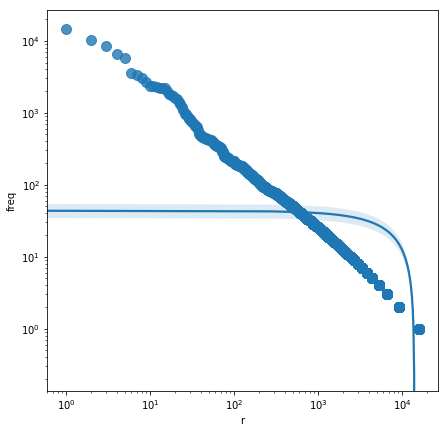

In [210]:
%matplotlib inline
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", word_counts, ax=ax, scatter_kws={"s": 100})

Agora geraremos *bigramas*, ou seja, uma sequência de duas palavras, e faremos o mesmo procedimento realizado acima.

# Questão 4

Para responder essa questão, geraremos uma tabela semelhate a tabela 4.5 do livro texto. Dessa maneira, utilizaremos o conceito de *Lei de Heap*  para realizarmos estimativas da ocorrência de palavras na coleção.